In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv("C:/Users/sandh/Downloads/forecast/sales_train_evaluation.csv")
sales.head()    

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,Sum_day_wise
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,4,0,0,0,0,3,3,0,1,633
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,2,1,1,0,0,0,0,0,500
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,2,0,0,0,2,3,0,1,309
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,4,0,1,3,0,2,6,3337
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,2,1,0,0,2,1,0,1888


## Already added a column in sales csv in the end which calculates, the total sales of eah day and stores it in 'Sum_day_wise'

In [46]:
sales['Sum_day_wise'].head()

0     633
1     500
2     309
3    3337
4    1888
Name: Sum_day_wise, dtype: int64

#### Adding the relevant columns from calendar to sales csv

In [3]:
calendar = pd.read_csv("C:/Users/sandh/Downloads/forecast/calendar.csv")
calendar.head()  

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [4]:
Weekday = calendar['weekday']
Date = calendar['date']
Event_1 = calendar['event_name_1']
Event_type = calendar['event_type_1']
Month = calendar['month']
Year = calendar['year']

In [5]:
sales['Weekday'] = Weekday
sales['Date'] = Date
sales['Event_1'] = Event_1
sales['Event_type'] = Event_type
sales['Year'] = Year
sales['Month'] = Month

#### Wrangling the data

In [6]:
sales['dept_id'].unique()

array(['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
       'FOODS_2', 'FOODS_3'], dtype=object)

In [7]:
sales['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

In [8]:
sales['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [9]:
sales['state_id'].unique()

array(['CA', 'TX', 'WI'], dtype=object)

# Starting with High Variables such as Date and Location

### Identifying the sales pattern state-wise

<AxesSubplot:xlabel='state_id'>

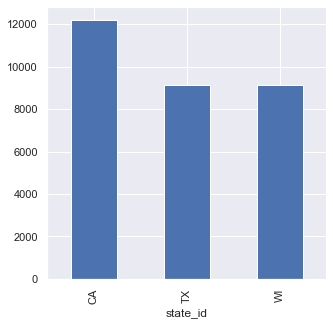

In [29]:
group_1 = sales.groupby(['state_id'])
Location = group_1.count()
Location['Sum_day_wise'].plot.bar(figsize=(5,5))

### The region CA state seems to have the highest state followed by TX and WI which have similar sales level.

## Identifying the products in demand in these region

<AxesSubplot:xlabel='state_id,cat_id'>

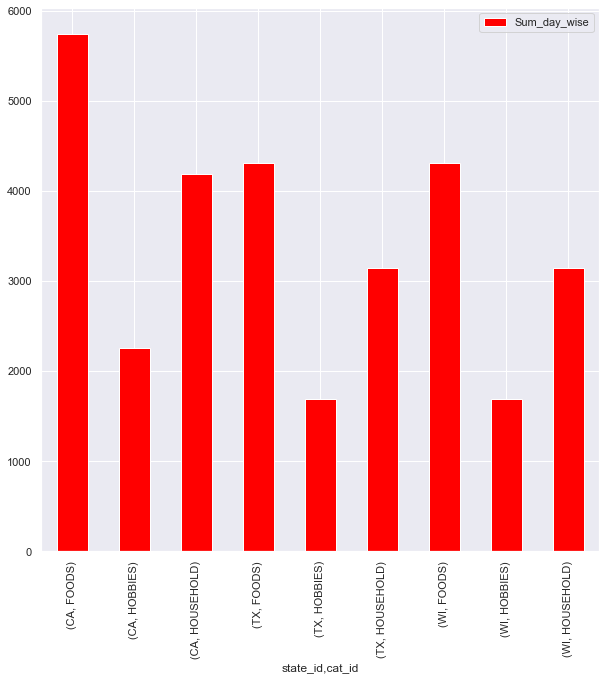

In [68]:
Category_Location_wise = sales[['state_id','cat_id','Sum_day_wise']].groupby(['state_id','cat_id'])
Category_Location_wise.count().plot.bar(color = 'red' , figsize = (10,10))

### All Location are following a similar pattern: The highest sale is for Food followed by Households and then Hobbies

##### Further delving to find out, which kind of FOODS, HOBBIES AND HOUSEHOLDS are preferred in which region

<AxesSubplot:xlabel='state_id,dept_id'>

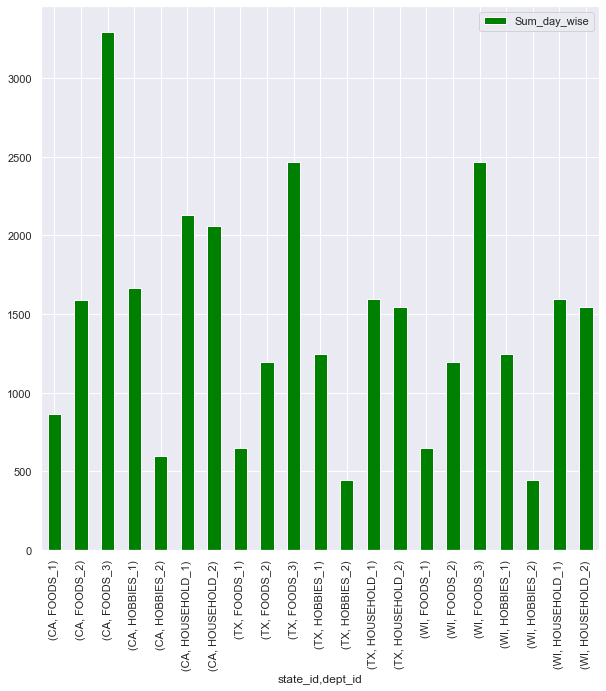

In [69]:
Department_Location_wise = sales[['state_id','dept_id','Sum_day_wise']].groupby(['state_id','dept_id'])
Department_Location_wise.count().plot.bar(color = 'green' , figsize = (10,10))

### In all Locations:
1. FOODS_3 is preferred over others in all Locations and contributes to a significant share than the the other two
2. HOBBIES_1 is preferred over others in all Locations and contributes to a significant share than the the other two
3. HOUSEHOLDS_1 AND HOUSEHOLDS_2 are in equal demands in all of the regions

# Identifying the sales pattern Yearly and Monthly

<AxesSubplot:xlabel='Year'>

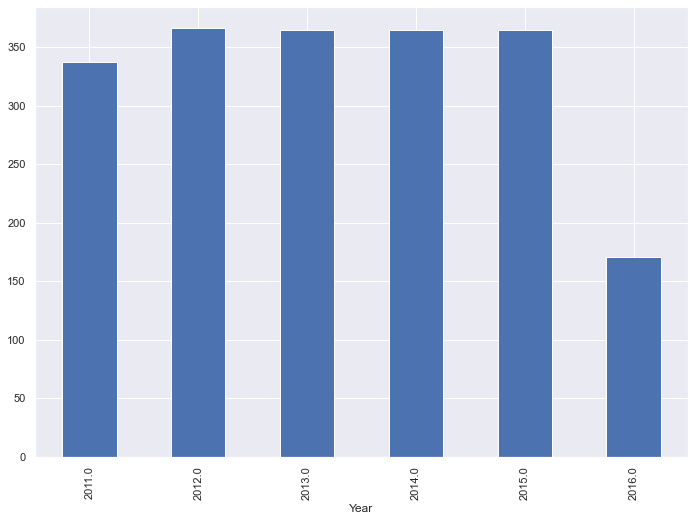

In [19]:
group_2 = sales.groupby(['Year'])
yearly_analysis = group_2.count()
yearly_analysis['Sum_day_wise'].plot.bar()

#### We observe that 2016 had very less sales, I'll now delve into detail analysis to establish the possible causes behind this.

#### Understanding the sales through the lens of Holidays

<AxesSubplot:xlabel='Year'>

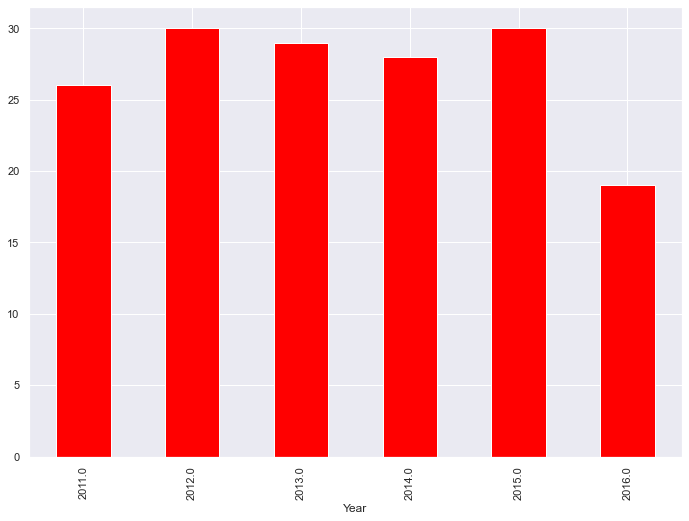

In [20]:
yearly_analysis['Event_1'].plot.bar(color = 'red')

#### This establishes that there seems to be a correlaton between the amount of products sold and a holiday
#### As, the year 2016 has the least amount of products sold, and the year 2016 also had the least amount of holidays.

In [21]:
yearly_analysis['Event_type']

Year
2011.0    26
2012.0    30
2013.0    29
2014.0    28
2015.0    30
2016.0    19
Name: Event_type, dtype: int64

#### Having established a realtion between Sales and Events we now check if there's a recurring pattern in months over the years 

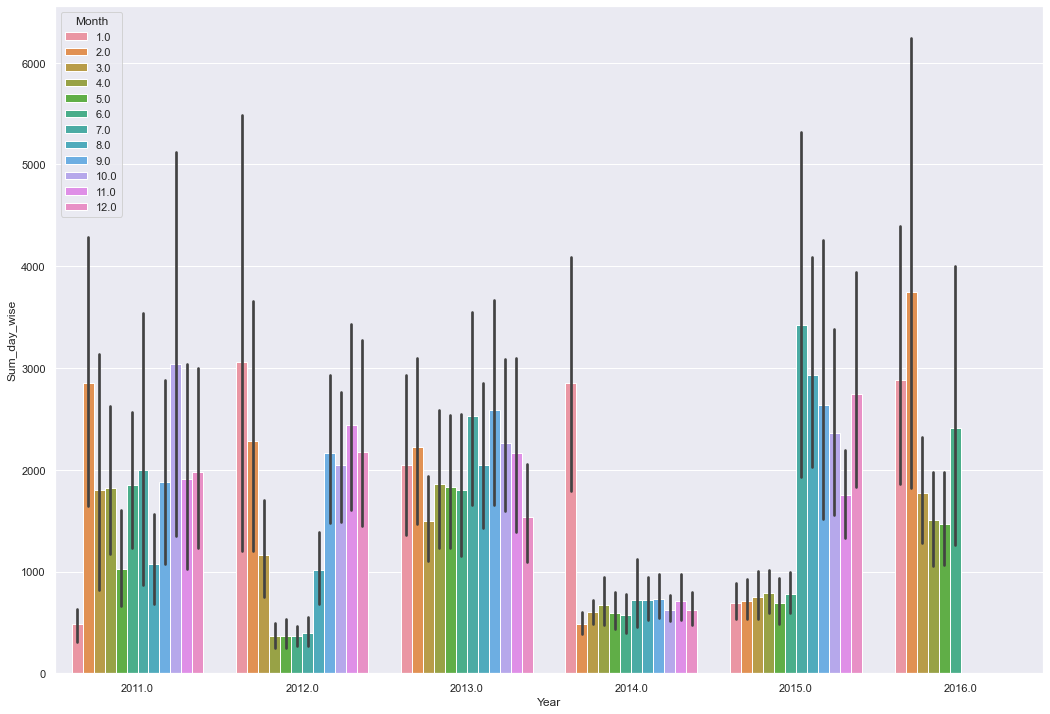

In [33]:
sns.barplot(x = sales['Year'], y = sales['Sum_day_wise'], hue = sales['Month'])
sns.set(rc={'figure.figsize':(17.7,12.27)})

#### No discernible pattern in the sales of month

#### However, when we take commulative sales of month of all the years we notice inreased sales in January and Feburary

<AxesSubplot:xlabel='Month'>

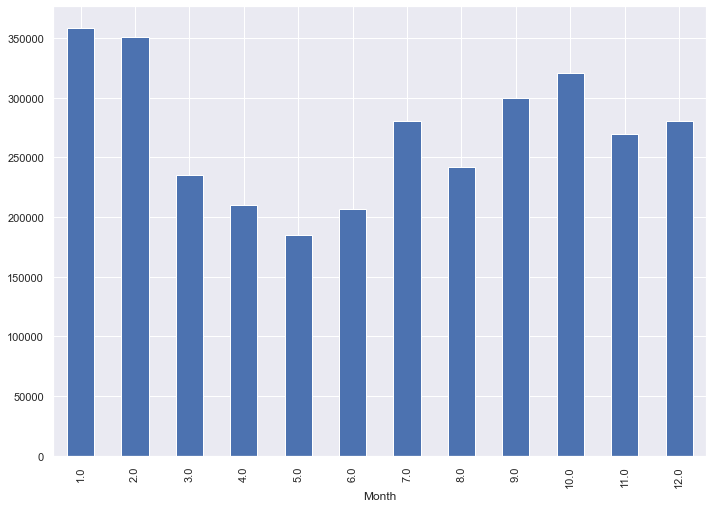

In [22]:
monthly_analysis = sales.groupby(['Month'])
Sum = monthly_analysis.sum()
Sum['Sum_day_wise'].plot.bar()

#### When we look at monthly data through the lens of the holidays our previous hypothesis of increased sales during Holidays is confirmed

<AxesSubplot:xlabel='Month'>

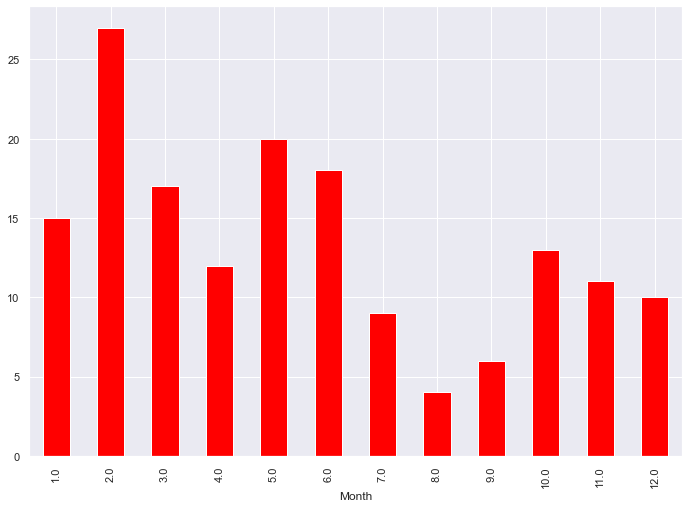

In [23]:
monthly_analysis['Event_1'].count().plot.bar(color = 'red')

#### The correaltion between Sales and Holdiays appears to be vague but is surely discernible in monthly data

#### I will now look at data through more detailed variables such as product_categories and departments

<AxesSubplot:xlabel='cat_id'>

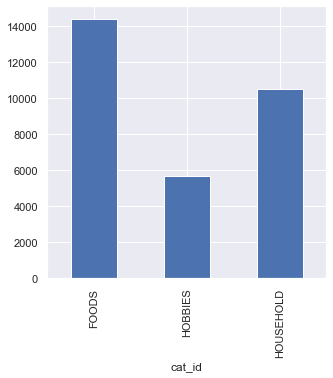

In [37]:
group_4 = sales.groupby(['cat_id'])
Category = group_4.count()
Category['Sum_day_wise'].plot.bar(figsize = (5,5))

#### The category Food seems to be in the highest demand
#### However, in order to determine which food type in particular is in more demand we look at the data dthrough department wise and establish:

<AxesSubplot:xlabel='dept_id'>

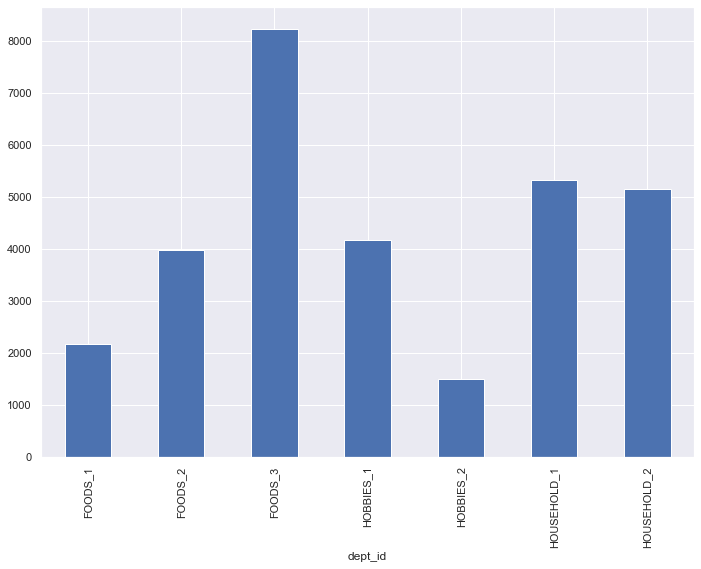

In [38]:
group_5 = sales.groupby(['dept_id'])
Department = group_5.count()
Department['Sum_day_wise'].plot.bar()

#### In food category it's only FOODS_3 which is contributing to the major chunk of the sales and in Household objects both the categories are in equal demand

#### Now, we'll see if there's demand of these products rising in one particular month for these varied products

C:\Users\sandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


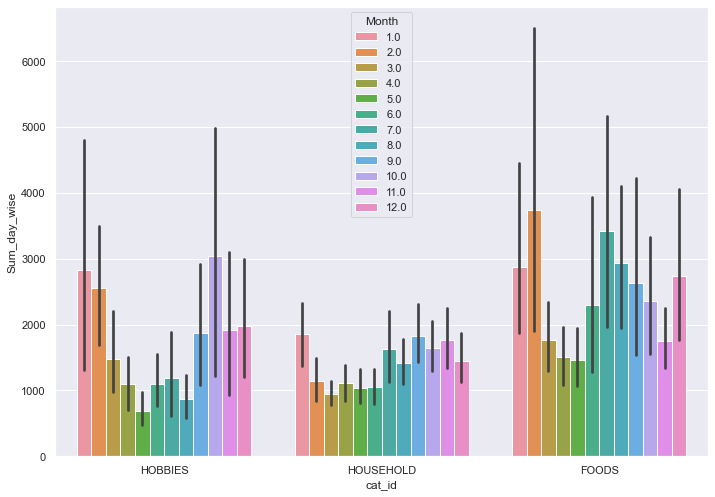

In [25]:
sns.barplot(sales['cat_id'], y = sales['Sum_day_wise'],hue = 'Month', data = sales)
sns.set(rc={'figure.figsize':(16.7,15.13)})

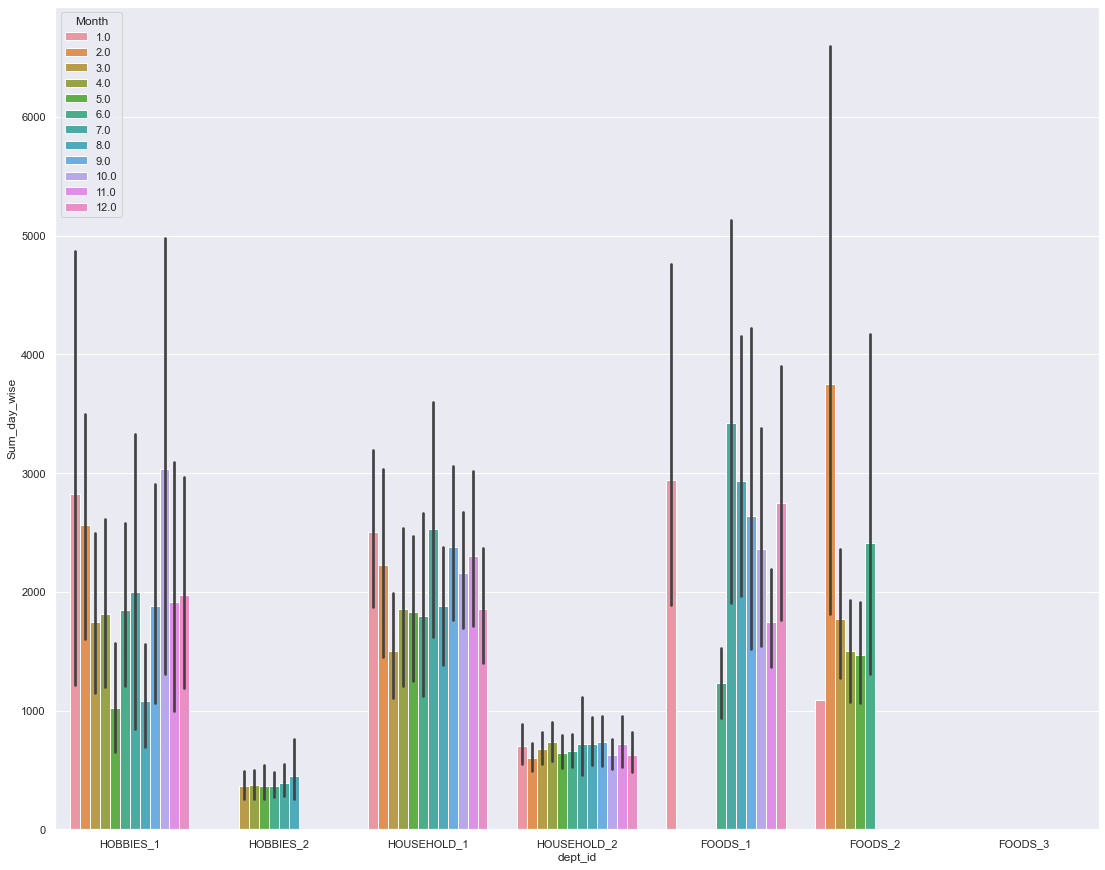

In [60]:
sns.barplot(x = sales['dept_id'], y = sales['Sum_day_wise'], hue = sales['Month'])
sns.set(rc={'figure.figsize':(18.7,1.13)})

#### We realise Households are in demand throughout the year, however, foods are in gretaest demand during Feburary which also has the most number of events.
### So, A tip from my side, ramp up food production in Feburary and keep your shelves full of Food_3 and thanks me later.
## :)

### 1. Households maintain a standstill position throughout the year.
### 2. Hobbies plung down to it lowest during Summers.

# Major Findings:

1. State_wise: The region CA state seems to have the highest state followed by TX and WI which have almost similar sales level:
   -  All Location are following a similar pattern: The highest sale is for Food followed by Households and then Hobbies
2. In all Locations:
   - FOODS_3 is preferred over others in all Locations and contributes to a significant share than the the other two
   - HOBBIES_1 is preferred over others in all Locations and contributes to a significant share than the the other two
   - HOUSEHOLDS_1 AND HOUSEHOLDS_2 are in equal demands in all of the regions
2. Time: Yearly sales plunged in 2016
   - Because least number of Events in 2016
   - The hypotheseis is further confirmed when we look at the monthly data
3. Realizing that the sales rises during the months of January and Feburary as it has the most number of events we figure:
   - Foods is the most sold commodity during those times
   - Not all food but Food_3 occupies most of the demand of the Food category
4. Other categories incuding Household remain Standstill throughout the year:
   